#Prediccion de Precios de Casas: Regresion Lineal


* El objetivo de este ejercicio es el de obtener una predicción de los precios de las casas, conocidas unas características de las mismas y su precio.


* Sobre el Dataset se tienen las siguientes características:
    1. pies_cuadrados_casa
    2. num_baños
    3. num_habitaciones
    4. num_cocinas
    5. num_coches_garaje
    6. pies_cuadrados_garaje
    7. precio_dolares


* En este ejercicio ***se realizará una regresión lineal simple***, tomando como ***variable independiente los pies cuadrados*** de la casa y como ***variable dependiente el precio***.


* Para realizar este ejercicio se pide:
<span></span><br>
    1. Carga de datos (Resuelto)
<span></span><br>
    2. ***Cambio de estructura de datos a numpy*** para el uso de Scikit-Learn
<span></span><br>
    3. ***Visualizar con una gráfica de dispersión la relación entre precio y pies cuadrados de las casas***
<span></span><br>
    4. ***Creacción del modelo y ajuste del mismo***
<span></span><br>
    5. ***Obtención del modelo*** (Resta de Regresión)
<span></span><br>
    6. ***Visualización del modelo*** en el que se muestre una gráfica de dispersión con la elación entre precio y pies cuadrados de las casas y por otro lado (y en la misma gráfica) la recta de regresión.
<span></span><br>
    7. ***Medición de la calidad de los resultados***: Obtención del Coeficiente de Determinación R<sup>2</sup>

<hr>


* En primer lugar vamos a importar las librería necesarias:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

<hr>


### 1. Carga de Datos

In [3]:
folder = "/content/drive/MyDrive/Colab Notebooks/2° Cuatri Python/Archivos varios"
df = pd.read_csv(folder + '/precio_casas.csv', header=0, sep=';')
df.head()

,pies_cuadrados_casa,num_banios,num_habitaciones,num_cocinas,num_coches_garaje,pies_cuadrados_garaje,precio_dolares
0,1710,2,3,1,2,548,208500
1,1262,2,3,1,2,460,181500
2,1786,2,3,1,2,608,223500
3,1717,1,3,1,3,642,140000
4,2198,2,4,1,3,836,250000


<hr>


### 2. Cambio de estructura de datos a numpy


In [4]:
#Convertimos los valores de "pies_cuadrados_casa" y "precio_dolares" en ndarrays
X = df["pies_cuadrados_casa"].values
y = df["precio_dolares"].values

#Cambiamos nuevamente la estructura de X a un array de arrays
X = np.reshape(np.asarray(X), (len(X), 1))

#Imprimimos los resultados
print('Superficie Casa - X: ', X)
print('Precio en Dólares - Y: ', y)

Superficie Casa - X:  [[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]]
Precio en Dólares - Y:  [208500 181500 223500 ... 266500 142125 147500]


<hr>


### 3. Visualizar con una gráfica de dispersión la relación entre precio y pies cuadrados de las casas


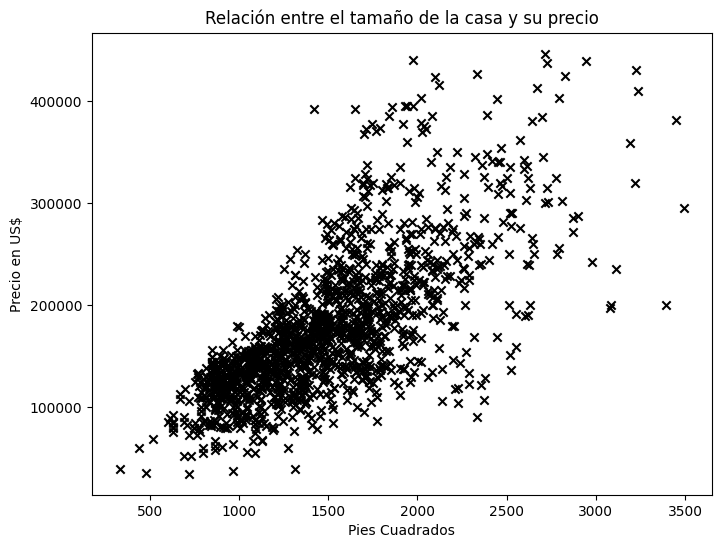

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(X, y, color = "black", marker = "x")
ax.set_title("Relación entre el tamaño de la casa y su precio")
ax.set_xlabel('Pies Cuadrados')
ax.set_ylabel('Precio en US$')
plt.show()

<hr>


### 4. Creacción del modelo y ajuste del mismo


In [6]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

<hr>


### 5. Obtención del modelo (Resta de Regresión)


In [7]:
#Estadísticos

a = reg.coef_[0]
b = reg.intercept_

print(f"Ecuación de regresión estimada\n\n Y = {round(a, 2)} · X + {round(b, 2)}")

Ecuación de regresión estimada

 Y = 102.94 · X + 23354.82


<hr>


### 6. Visualización del modelo en el que se muestre una gráfica de dispersión con la relación entre precio y pies cuadrados de las casas y por otro lado (y en la misma gráfica) la recta de regresión.


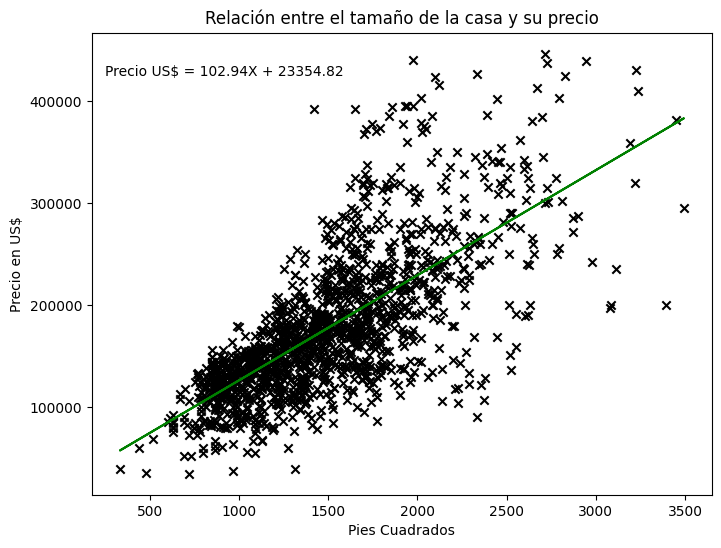

In [8]:
#Obtención de las predicciones
y_predicciones = reg.predict(X)

#Graficando la dispersión y la recta de regresión
fig, ax =  plt.subplots(figsize=(8, 6))
ax.scatter(X, y,  color='black', marker='x')
ax.plot(X, y_predicciones, color='green')
ax.set_title("Relación entre el tamaño de la casa y su precio")
ax.set_xlabel("Pies Cuadrados")
ax.set_ylabel("Precio en US$")
ax.text(250, 425000, f"Precio US$ = {round(a, 2)}X + {round(b, 2)}")
plt.show()

<hr>


### 7. Medición de la calidad de los resultados: Obtención del Coeficiente de Determinación R<sup>2</sup>

In [9]:
r2 = reg.score(X, y)

print(f"Coeficiente de determinación R^2: {round(r2,5)}")
print(f"Porcentaje de acierto del modelo: {round(r2,5) * 100}%")

Coeficiente de determinación R^2: 0.50298
Porcentaje de acierto del modelo: 50.298%


### **Conclusión del Proyecto**

En este proyecto utilizamos una **regresión lineal simple** para analizar la relación entre los pies cuadrados de una casa y su precio. Obtuvimos un coeficiente de determinación $(R^2)$ de **0.50298**, lo que indica que esta variable explica aproximadamente el 50% de la variación en los precios.

Esto demuestra que el tamaño de la casa es un **factor clave** en la determinación del precio, pero no el único. Incorporar más variables como número de habitaciones, baños o tamaño del garaje podría mejorar la precisión del modelo.

En conclusión, este análisis nos permitió identificar una relación significativa entre el tamaño de las casas y sus precios, estableciendo una base para explorar modelos más complejos en el futuro.